# Stack Overflow Developer Survey 2021

#### Import Relevant Libraries / Dependancies 

In [489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import autoreload
import missingno as msno
import warnings
import csv
import os
import sys

from collections import defaultdict, Counter
from scipy.stats.mstats import winsorize

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

figure = (12, 9)


pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 10000)

sb.set_style('darkgrid')
sb.set()

warnings.filterwarnings('ignore')

#### Load Dataset from Host machine

In [312]:
df = pd.read_csv("D:\Open Classroom\Datasets\stack-overflow-developer-survey-2021\survey_results_public.csv")
df.head(3)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN


## Exploratory Ananlysis 

#### Statistical represenattion of dataset

In [313]:
print(f'The Dataset has {df.shape[0]} columns and {df.shape[1]} rows')

The Dataset has 83439 columns and 48 rows


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [315]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
ResponseId,83439.0,4.172000e+04,2.408691e+04,1.0,20860.5,41720.0,62579.5,8.343900e+04
CompTotal,47183.0,2.119407e+69,4.603702e+71,0.0,16000.0,67000.0,140000.0,1.000000e+74
ConvertedCompYearly,46844.0,1.184261e+05,5.272944e+05,1.0,27025.0,56211.0,100000.0,4.524131e+07


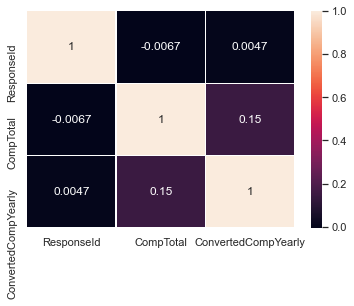

In [316]:
sb.heatmap(df.corr(), annot = True, linewidths=0.4)

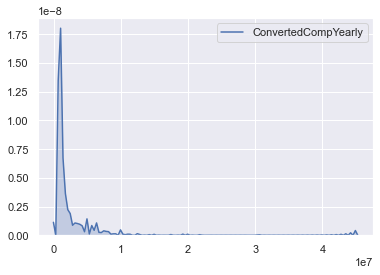

In [317]:
sb.kdeplot(df['ConvertedCompYearly'], shade=True)

In [318]:
df.head(2)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN


#### Data Cleaning 

In [319]:
df.isnull().sum()

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith          45418
ToolsTechHav

The dataset has too much NaN values which I can clean at the moment, it may distract my findings for the survey. 
So lets work with it in this manner

In [320]:
df.isnull().sum().sum()

689972

#### Graphical Representation of Series 

In [321]:
df['MainBranch'].value_counts()

I am a developer by profession                                                   58153
I am a student who is learning to code                                           12029
I am not primarily a developer, but I write code sometimes as part of my work     6578
I code primarily as a hobby                                                       4929
I used to be a developer by profession, but no longer am                          1237
None of these                                                                      513
Name: MainBranch, dtype: int64

In [322]:
df['Employment'].value_counts()

Employed full-time                                      53584
Student, full-time                                      11781
Independent contractor, freelancer, or self-employed     8041
Not employed, but looking for work                       2961
Employed part-time                                       2461
Student, part-time                                       2051
Not employed, and not looking for work                   1228
I prefer not to say                                       890
Retired                                                   326
Name: Employment, dtype: int64

In [323]:
df['Country'].value_counts().head(10)

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
France                                                   2708
Brazil                                                   2254
Poland                                                   1805
Netherlands                                              1772
Italy                                                    1666
Name: Country, dtype: int64

#### Based on the workload of the Dataset I will shift to csv module and perform analysis from that perspective 

### Geographic

#### Determine which country has the most number of survey respondence from Developers
#### Also categorize them based on states 

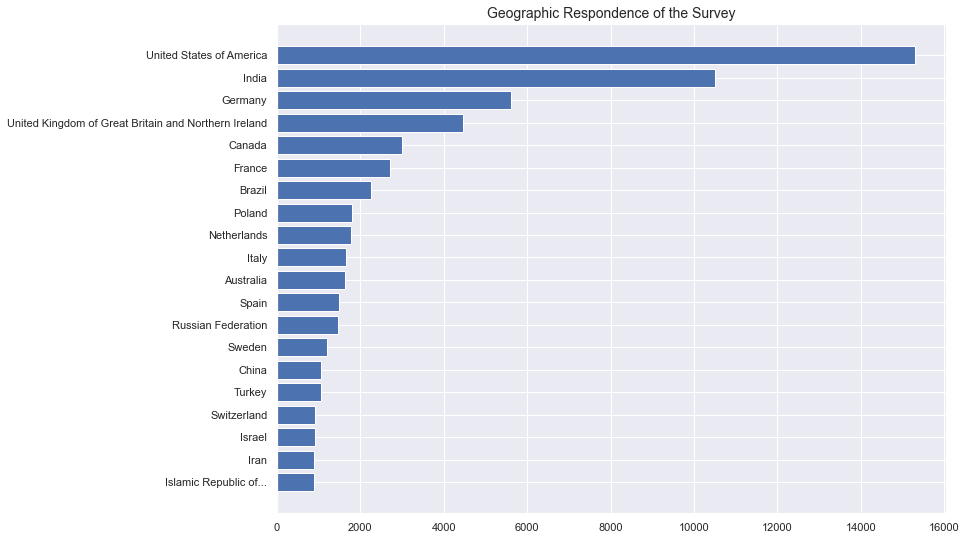

In [324]:
with open("D:\Open Classroom\Datasets\stack-overflow-developer-survey-2021\survey_results_public.csv") as file:
    reader = csv.DictReader(file)
    counter = Counter()
    
    
    
    for i in reader:
        counter.update(i['Country'].split(','))

            
country_name = []
country_count = []  

for j in counter.most_common(20):    
    country_name.append(j[0])
    country_count.append(j[1])
    
country_name.reverse() 
country_count.reverse()

plt.figure(figsize = (figure))
plt.barh(country_name, country_count)
plt.title('Geographic Respondence of the Survey',fontdict={'size': 14})
plt.show()
        

In [325]:
geographic = df.groupby('Country')
state = geographic.get_group(input('Enter Country'))
state['US_State'].value_counts().to_frame().head(5)

Enter Country Kenya


,US_State


In [326]:
df['US_State'].unique()

array([nan, 'Georgia', 'New Hampshire', 'Missouri',
       'District of Columbia', 'Massachusetts', 'Louisiana', 'Virginia',
       'New York', 'Texas', 'Colorado', 'Minnesota', 'Maryland',
       'California', 'Iowa', 'Illinois', 'Arkansas', 'South Carolina',
       'Pennsylvania', 'Nebraska', 'North Carolina', 'Tennessee',
       'Kansas', 'Connecticut', 'Rhode Island', 'Florida', 'Ohio',
       'Vermont', 'Kentucky', 'Washington', 'New Jersey', 'Alabama',
       'Wisconsin', 'Indiana', 'North Dakota', 'Utah', 'Arizona',
       'Michigan', 'Oregon', 'Montana', 'Maine', 'West Virginia',
       'Oklahoma', 'New Mexico', 'I do not reside in the United States',
       'Idaho', 'South Dakota', 'Alaska', 'Nevada', 'Puerto Rico',
       'Delaware', 'Hawaii', 'Wyoming', 'Mississippi', 'American Samoa',
       'Guam'], dtype=object)

In [327]:
df.head(2)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN


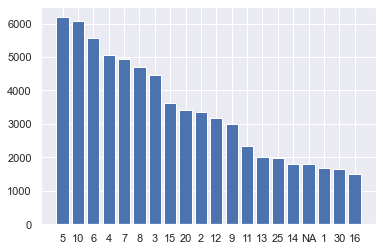

In [328]:
with open("D:\Open Classroom\Datasets\stack-overflow-developer-survey-2021\survey_results_public.csv") as file:
    reader = csv.DictReader(file)
    counter = Counter()
    
    for rec in reader:
        counter.update(rec['YearsCode'].split(','))
        
years_code = []
yrs_count = []

for i in counter.most_common(20):
    years_code.append(i[0])
    yrs_count.append(i[1])
    
plt.bar(years_code, yrs_count)
plt.show()

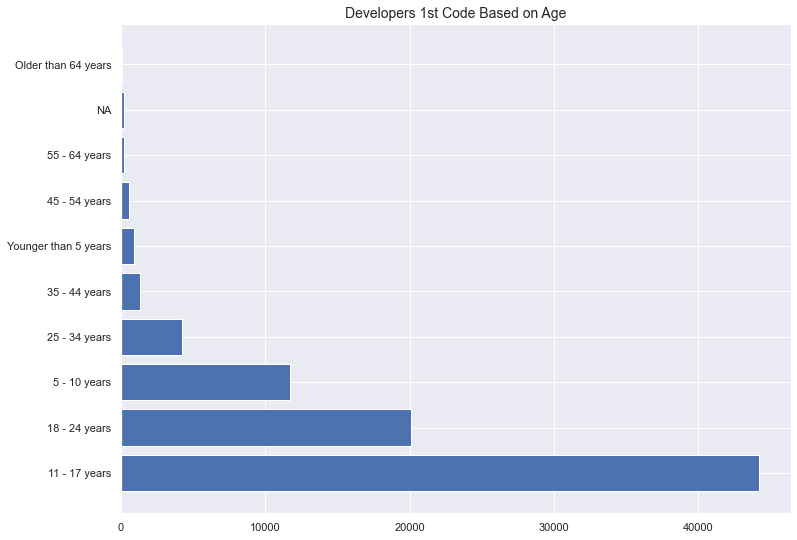

In [329]:
with open("D:\Open Classroom\Datasets\stack-overflow-developer-survey-2021\survey_results_public.csv") as file:
    reader = csv.DictReader(file)
    counter = Counter()
    
    for i in reader:
        counter.update(i['Age1stCode'].split(','))
        
age1stcode = []
age_count = []

for i in counter.most_common(10):
    age1stcode.append(i[0])
    age_count.append(i[1])

age1stcode.reverse
age_count.reverse

plt.figure(figsize = figure)
plt.barh(age1stcode, age_count)
plt.title('Developers 1st Code Based on Age', fontdict={'size':14})
plt.show()

In [330]:
first_code = df.groupby('Age1stCode')
#get_first_code = first_code.get_group('DevType')
first_code['EdLevel'].value_counts().head(50)

Age1stCode     EdLevel                                                                           
11 - 17 years  Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          18203
               Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        8862
               Some college/university study without earning a degree                                 6065
               Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     6048
               Associate degree (A.A., A.S., etc.)                                                    1245
               Other doctoral degree (Ph.D., Ed.D., etc.)                                             1228
               Primary/elementary school                                                              1128
               Something else                                                                          744
               Professional degree (JD, MD, et

In [331]:
df.head(2)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN



<bound method Counter.most_common of Counter({'Other online resources (ex: videos, blogs, etc)': 49392, 'School': 44462, 'Books / Physical media': 42752, 'Online Courses or Certification': 33511, 'Online Forum': 26229, 'Friend or family member': 15162, 'Colleague': 14225, 'Coding Bootcamp': 8496, 'Other (please specify):': 6924, 'NA': 476})>


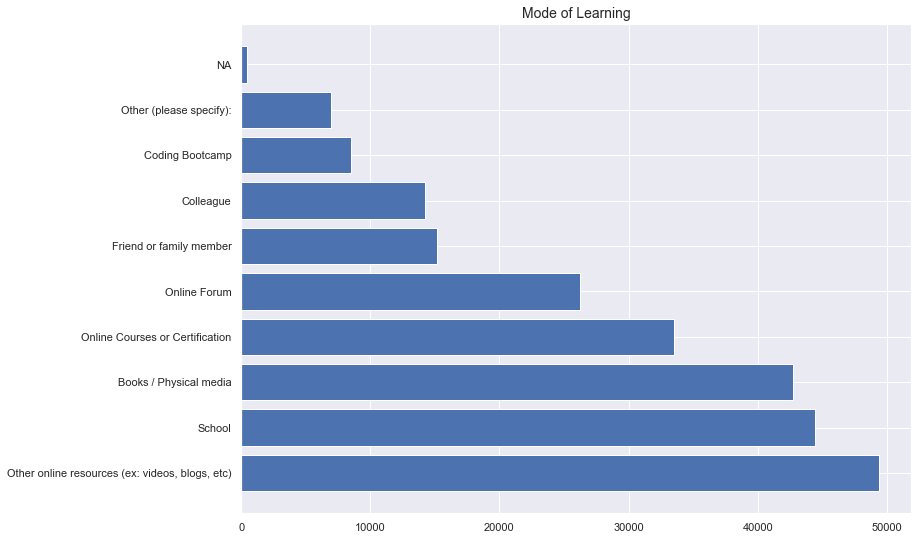

In [332]:
with open("D:\Open Classroom\Datasets\stack-overflow-developer-survey-2021\survey_results_public.csv") as file:
    reader = csv.DictReader(file)
    counter = Counter()
    
    for i in reader:
        counter.update(i['LearnCode'].split(';'))
        
learncode = []
pop_lc = []

for i in counter.most_common():
    learncode.append(i[0])
    pop_lc.append(i[1])
    
plt.figure(figsize = (figure))
plt.title('Mode of Learning', fontdict={'size': 14})
plt.barh(learncode, pop_lc)

print('')

print(counter.most_common)

In [333]:
with open("D:\Open Classroom\Datasets\stack-overflow-developer-survey-2021\survey_results_public.csv") as file:
    reader = csv.DictReader(file)
    counter = Counter()
    
    total_count = 0
    
    for i in reader:
        counter.update(i['DevType'].split(';'))
        total_count += 1

    for dt, tc in counter.most_common():
        total_pct = round((tc / total_count) * 100, 2)
        print(f'{dt} \t {total_pct}')
#print(counter.most_common())

Developer, full-stack 	 39.42
Developer, back-end 	 34.84
Developer, front-end 	 21.85
NA 	 20.32
Developer, desktop or enterprise applications 	 13.23
Developer, mobile 	 11.75
DevOps specialist 	 8.46
System administrator 	 7.29
Database administrator 	 6.78
Designer 	 5.53
Developer, embedded applications or devices 	 5.51
Data scientist or machine learning specialist 	 5.12
Student 	 5.02
Engineer, data 	 5.0
Engineering manager 	 4.57
Data or business analyst 	 4.54
Developer, QA or test 	 4.33
Other (please specify): 	 4.25
Product manager 	 3.68
Academic researcher 	 3.47
Engineer, site reliability 	 2.93
Educator 	 2.84
Developer, game or graphics 	 2.53
Senior Executive (C-Suite, VP, etc.) 	 2.52
Scientist 	 2.41
Marketing or sales professional 	 0.76


In [334]:
df.head(2)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN


JavaScript 64.22
HTML/CSS 55.44
Python 47.69
SQL 46.54
Java 34.95
Node.js 33.53
TypeScript 29.85
C# 27.55
Bash/Shell 26.83
C++ 24.04


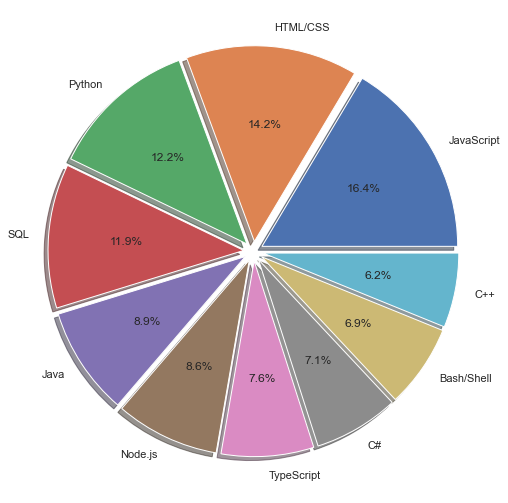

In [335]:
with open("D:\Open Classroom\Datasets\stack-overflow-developer-survey-2021\survey_results_public.csv") as file:
    reader = csv.DictReader(file)
    counter = Counter()
    total_count = 0
    
    for i in reader:
        counter.update(i['LanguageHaveWorkedWith'].split(';'))
        total_count += 1

        lang = []
        lang_count = []
        

    for lww, ttc in counter.most_common(10):
        lww_count = (ttc / total_count) * 100
        lww_count = round(lww_count, 2)
        print(f'{lww} {lww_count}')
        
    for i in counter.most_common(10):
        lang.append(i[0])
        lang_count.append(i[1])

plt.figure(figsize = (figure))
plt.pie(x = lang_count, labels = lang, shadow=True, autopct='%1.1f%%', explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
#plt.title('Top Language proficient to Developers', fontdict = {'size': 14})
plt.show()

In [336]:
df['Age'].value_counts()

25-34 years old       32568
18-24 years old       20993
35-44 years old       15183
45-54 years old        5472
Under 18 years old     5376
55-64 years old        1819
Prefer not to say       575
65 years or older       421
Name: Age, dtype: int64

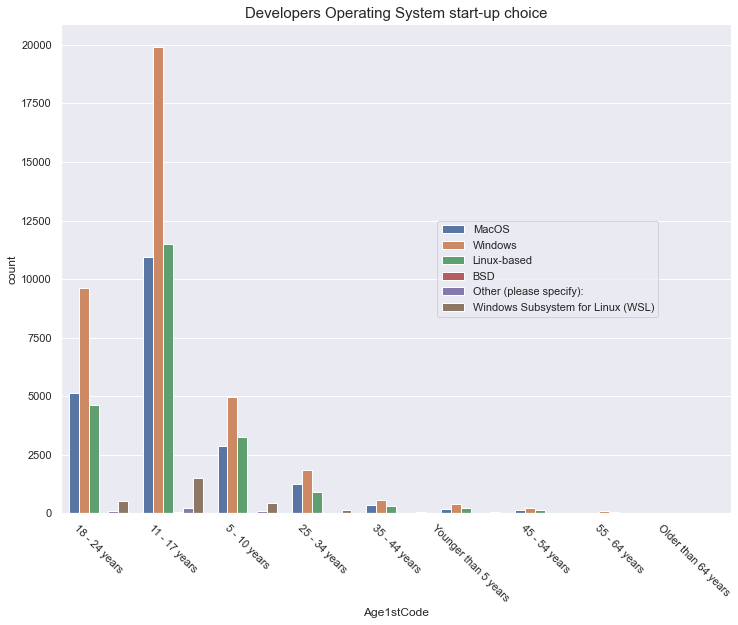

In [337]:
plt.figure(figsize = (figure))
sb.countplot(x = df['Age1stCode'], data = df, hue = df['OpSys'])
plt.title('Developers Operating System start-up choice', fontdict = {'size': 15})
plt.xticks(rotation = -45)
plt.legend(loc = 'center right', bbox_to_anchor=(0.9, 0.5))

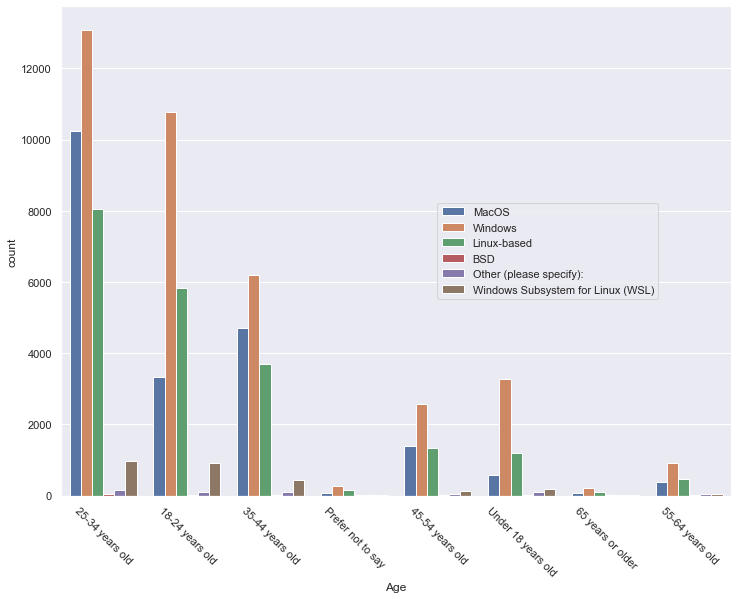

In [338]:
plt.figure(figsize = (figure))
sb.countplot(x = df['Age'], data = df, hue = df['OpSys'])
plt.xticks(rotation = -45)
plt.legend(loc = 'center right', bbox_to_anchor=(0.9, 0.5))

In [339]:
df.head(2)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN


In [340]:
nums = ['ResponseId', 'YearsCode', 'YearsCodePro', 'CompTotal', 'ConvertedCompYearly']
round(df[nums].describe(include='all'))

,ResponseId,YearsCode,YearsCodePro,CompTotal,ConvertedCompYearly
count,83439.0,81641,61216,4.718300e+04,46844.0
unique,NaN,52,52,NaN,NaN
top,NaN,5,3,NaN,NaN
freq,NaN,6190,5812,NaN,NaN
mean,41720.0,NaN,NaN,2.119407e+69,118426.0
std,24087.0,NaN,NaN,4.603702e+71,527294.0
min,1.0,NaN,NaN,0.000000e+00,1.0
25%,20860.0,NaN,NaN,1.600000e+04,27025.0
50%,41720.0,NaN,NaN,6.700000e+04,56211.0
75%,62580.0,NaN,NaN,1.400000e+05,100000.0


#### Data Cleaning

In [341]:
df['ResponseId'].fillna(df['ResponseId'].mean())

0            1
1            2
2            3
3            4
4            5
         ...  
83434    83435
83435    83436
83436    83437
83437    83438
83438    83439
Name: ResponseId, Length: 83439, dtype: int64

In [342]:
df[nums].isnull().sum()

ResponseId                 0
YearsCode               1798
YearsCodePro           22223
CompTotal              36256
ConvertedCompYearly    36595
dtype: int64

In [343]:
df['CompTotal'] = df['CompTotal'].fillna(df['CompTotal'].mean())
df['CompTotal'].describe()

count    8.343900e+04
mean     2.119407e+69
std      3.461892e+71
min      0.000000e+00
25%      5.500000e+04
50%      4.350000e+05
75%      2.119407e+69
max      1.000000e+74
Name: CompTotal, dtype: float64

In [344]:
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean())
df['ConvertedCompYearly'].describe()

count    8.343900e+04
mean     1.184262e+05
std      3.950877e+05
min      1.000000e+00
25%      5.000000e+04
50%      1.184262e+05
75%      1.184262e+05
max      4.524131e+07
Name: ConvertedCompYearly, dtype: float64

In [345]:
df['YearsCode'].unique()

array([nan, '7', '17', '3', '4', '6', '16', '12', '15', '10', '40', '9',
       '26', '14', '39', '20', '8', '19', '5', 'Less than 1 year', '22',
       '2', '1', '34', '21', '13', '25', '24', '30', '31', '18', '38',
       'More than 50 years', '27', '41', '42', '35', '23', '28', '11',
       '37', '44', '43', '36', '33', '45', '29', '50', '46', '32', '47',
       '49', '48'], dtype=object)

In [346]:
df['YearsCode'] = df['YearsCode'].replace(['Less than 1 year'], 0)
df['YearsCode'] = df['YearsCode'].replace(['More than 50 years'], 50)
df['YearsCode'] = pd.to_numeric(df['YearsCode'])
df['YearsCode'].fillna(df['YearsCode'].mean())

0        12.336118
1         7.000000
2        12.336118
3        12.336118
4        17.000000
           ...    
83434     6.000000
83435     4.000000
83436    10.000000
83437     5.000000
83438    14.000000
Name: YearsCode, Length: 83439, dtype: float64

In [347]:
df['YearsCodePro'] = df['YearsCodePro'].replace(['Less than 1 year'], 0)
df['YearsCodePro'] = df['YearsCodePro'].replace(['More than 50 years'], 50)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'])
df['YearsCodePro'].fillna(df['YearsCodePro'].mean())

0         9.183481
1         9.183481
2         9.183481
3         9.183481
4        10.000000
           ...    
83434     5.000000
83435     2.000000
83436     4.000000
83437     3.000000
83438     4.000000
Name: YearsCodePro, Length: 83439, dtype: float64

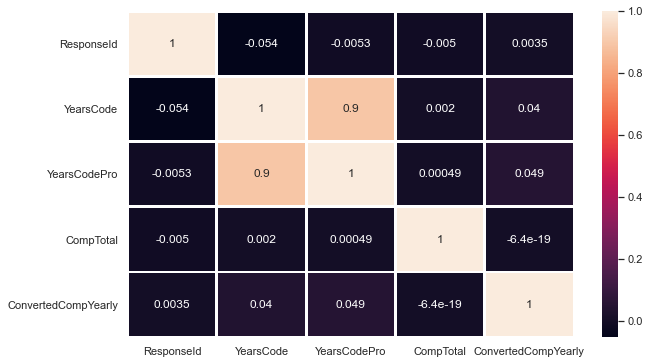

In [348]:
plt.figure(figsize = (10,6))
sb.heatmap(df[nums].corr(), annot = True, linewidths=1.9)

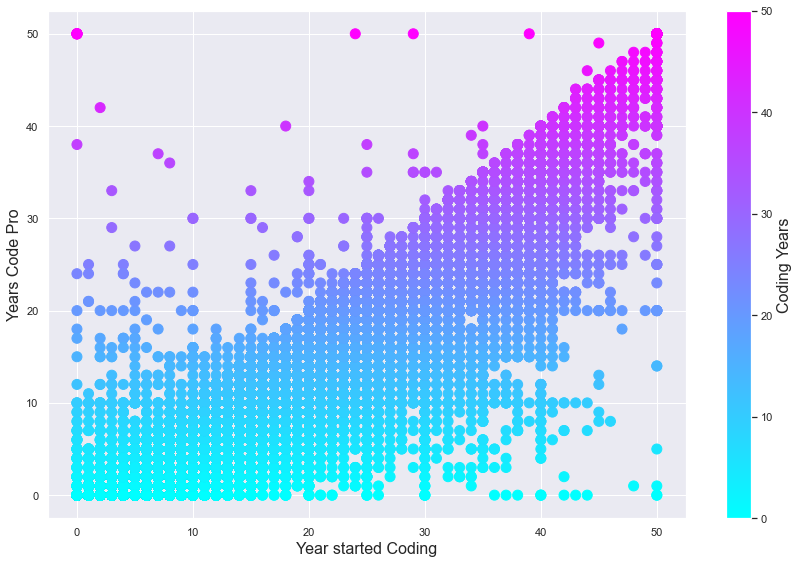

In [349]:
#sb.scatterplot(df['YearsCodePro'], df['ConvertedCompYearly'])

plt.figure(figsize = (12, 8))
plt.scatter(x = df['YearsCode'], y = df['YearsCodePro'], s = 100, c = df['YearsCodePro'], cmap = "cool", label = True)

cbar = plt.colorbar()
cbar.set_label("Coding Years", fontdict = {'size': 16})
plt.xlabel("Year started Coding", fontdict = {'size': 16})
plt.ylabel("Years Code Pro", fontdict = {'size': 16})
plt.tight_layout()
plt.show()

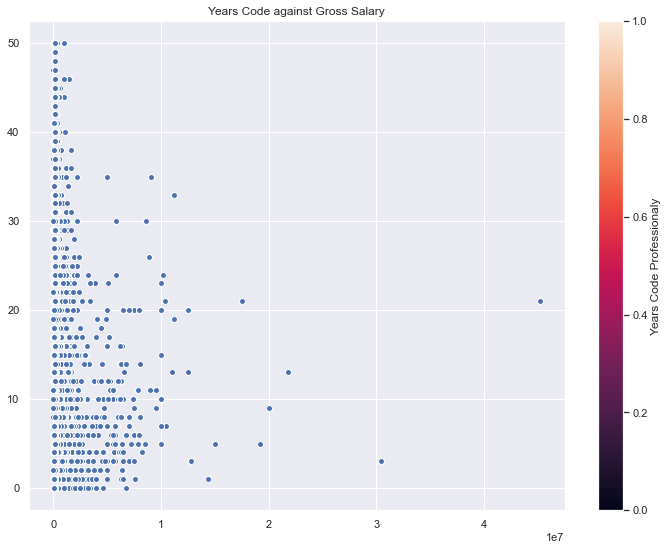

In [350]:
plt.figure(figsize = (figure))
plt.scatter(df['ConvertedCompYearly'], df['YearsCodePro'], cmap = "YlGn", edgecolor = "white")
cbar = plt.colorbar()
cbar.set_label("Years Code Professionaly")
#plt.xscale("log")
#plt.yscale("log")
plt.title("Years Code against Gross Salary")
plt.show()

In [351]:
print(df['ConvertedCompYearly'].max())
print(df['ConvertedCompYearly'].min())

45241312.0
1.0


### Feature Engineering

In [352]:
df.sample()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
12861,12862,I am a developer by profession,Employed full-time,Spain,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18 - 24 years,Books / Physical media,6.0,5.0,"Developer, back-end",20 to 99 employees,EUR European Euro,37680.0,Yearly,Perl;Python;R,Go,PostgreSQL;Redis;SQLite,NaN,AWS,NaN,Django,FastAPI,NumPy;Pandas,NaN,Docker;Git;Kubernetes,NaN,RStudio;Visual Studio Code,NaN,Linux-based,Visit Stack Overflow;Google it;Do other work a...,Stack Overflow;Stack Exchange,Daily or almost daily,No,NaN,"No, not really",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,40731.0


In [353]:
round(df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean()), 2)

0         62268.00
1        118426.15
2        118426.15
3        118426.15
4        118426.15
           ...    
83434    160500.00
83435      3960.00
83436     90000.00
83437    816816.00
83438     21168.00
Name: ConvertedCompYearly, Length: 83439, dtype: float64

In [354]:
df2 = df[['MainBranch', 'EdLevel', 'OpSys', 'YearsCode', 'Employment', 'Country', 'Age1stCode', 'YearsCodePro', 'ConvertedCompYearly']]
df2.head()

,MainBranch,EdLevel,OpSys,YearsCode,Employment,Country,Age1stCode,YearsCodePro,ConvertedCompYearly
0,I am a developer by profession,"Secondary school (e.g. American high school, G...",MacOS,NaN,"Independent contractor, freelancer, or self-em...",Slovakia,18 - 24 years,NaN,62268.00000
1,I am a student who is learning to code,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Windows,7.0,"Student, full-time",Netherlands,11 - 17 years,NaN,118426.15289
2,"I am not primarily a developer, but I write co...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",MacOS,NaN,"Student, full-time",Russian Federation,11 - 17 years,NaN,118426.15289
3,I am a developer by profession,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Windows,NaN,Employed full-time,Austria,11 - 17 years,NaN,118426.15289
4,I am a developer by profession,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Linux-based,17.0,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,5 - 10 years,10.0,118426.15289


In [377]:


null_values = [i for i in df2.columns if df2[i].isnull().sum() > 0]

cat = ['MainBranch', 'EdLevel', 'OpSys', 'Employment', 'Country', 'Age1stCode']

num = ['YearsCode', 'YearsCodePro', 'ConvertedCompYearly']


for i in null_values:
    if df2[i].dtype == 'object':
        si = SimpleImputer(strategy="most_frequent")
        df2[i] = si.fit_transform(df2[[i]])
        
for i in null_values:
    if df2[i].dtype == 'float64':
        si = SimpleImputer(strategy="mean")
        df2[i] = si.fit_transform(df2[[i]])

In [386]:
for i in df2:
    if df2[i].dtype == 'object':
        le = LabelEncoder()
        df2[i] = le.fit_transform(df2[[i]])

In [391]:
x = df2.drop(columns = ['ConvertedCompYearly'])
y = df2['ConvertedCompYearly']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



In [410]:
dtr = DecisionTreeRegressor()

dtr.fit(x_train, y_train)

pred = dtr.predict(x_train)
acc = dtr.score(x_train, pred)
print('Model accuracy score: ', acc)
print(pred)

Model accuracy score:  1.0
[132000.         116737.69214841 118426.15289044 ... 118426.15289044
 118426.15289044  46416.        ]


In [414]:
df2['PredComp'] = pd.concat([pd.DataFrame(pred)]) 

In [430]:
df2.head()

,MainBranch,EdLevel,OpSys,YearsCode,Employment,Country,Age1stCode,YearsCodePro,ConvertedCompYearly,PredComp
0,0,6,2,12.336118,3,145,1,9.183481,62268.00000,132000.000000
1,1,1,4,7.000000,7,112,0,9.183481,118426.15289,116737.692148
2,2,1,2,12.336118,7,134,0,9.183481,118426.15289,118426.152890
3,0,2,4,12.336118,0,8,0,9.183481,118426.15289,118426.152890
4,0,2,1,17.000000,3,171,5,10.000000,118426.15289,55224.000000


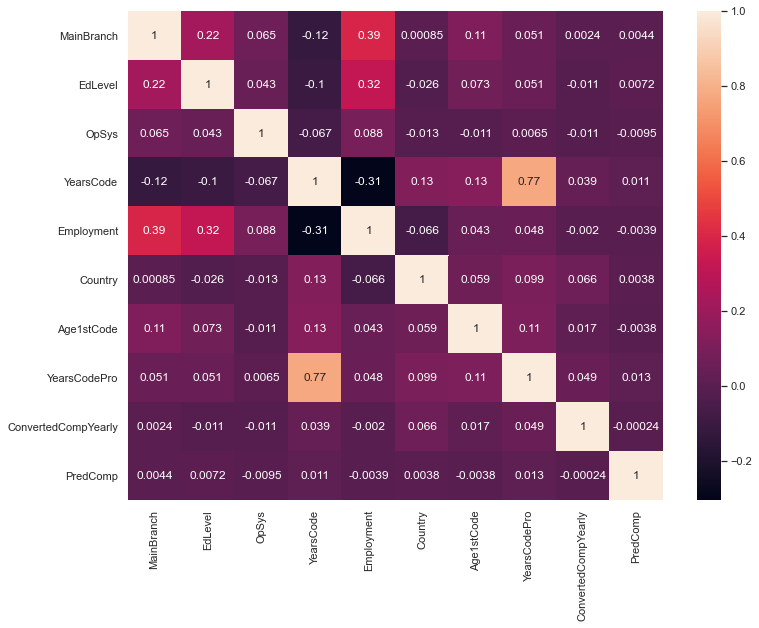

In [433]:

plt.figure(figsize=(figure))

sb.heatmap(df2.corr(), annot = True)

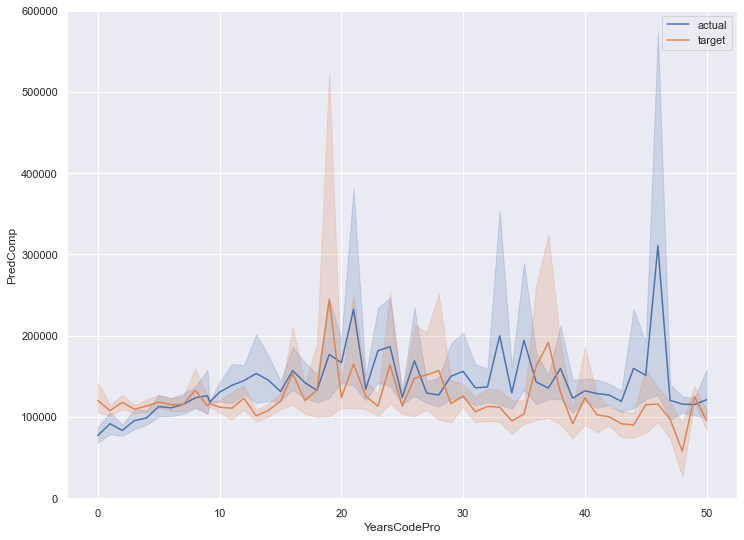

In [436]:

plt.figure(figsize=(figure))

sb.lineplot(x = df2['YearsCodePro'], y = df2['ConvertedCompYearly'], data = df2, label = 'actual')
sb.lineplot(x = df2['YearsCodePro'], y = df2['PredComp'], data = df2, label = 'target')

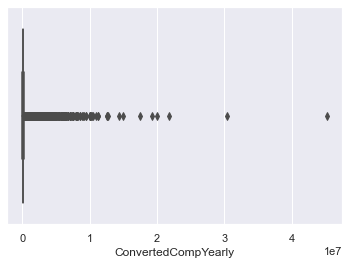

In [438]:
sb.boxplot(x = df['ConvertedCompYearly'])

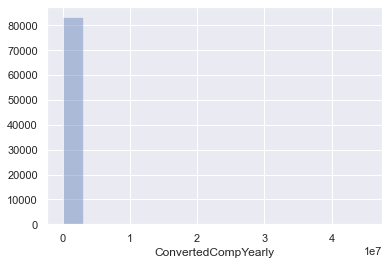

In [441]:
sb.distplot(df['ConvertedCompYearly'], bins = 15, kde=False)

### Tukey's Rule

Before handling outliers, we will detect them. We will use Tukey’s rule to detect outliers. It is also known as the IQR rule. First, we will calculate the Interquartile Range of the data (IQR = Q3 — Q1). Later, we will determine our outlier boundaries with IQR.

We will get our lower boundary with this calculation Q1–1.5 * IQR. We will get our upper boundary with this calculation Q3 + 1.5 * IQR.

According to this rule, the data between boundaries are acceptable but the data outside of the between lower and upper boundaries are outliers. We can use 2.5 or 2 to detect IQR. It depends on our data and analysis. But the most commonly used is 1.5 and we will use 1.5 IQR in this analysis.

In [446]:
df[['ConvertedCompYearly']].describe()

,ConvertedCompYearly
count,8.343900e+04
mean,1.184262e+05
std,3.950877e+05
min,1.000000e+00
25%,5.000000e+04
50%,1.184262e+05
75%,1.184262e+05
max,4.524131e+07


In [453]:
Q1 = round(df['ConvertedCompYearly'].quantile(0.25), 2)
Q3 = round(df['ConvertedCompYearly'].quantile(0.75), 2)

In [456]:
print('Q1: ',Q1)
print('Q3: ',Q3)

IQR = Q3 - Q1
print('Inter Quatile Range: ', IQR)

Q1:  50000.0
Q3:  118426.15
Inter Quatile Range:  68426.15


In [465]:
lower_lim = round(Q1 - 0.5 * IQR, 2)
upper_lim = round(Q3 + 0.5 * IQR, 2)

print('Lower Boundary: ', lower_lim)
print('Upper Boundary: ', upper_lim)

Lower Boundary:  15786.93
Upper Boundary:  152639.22


Our upper boundary is 152639.22 and our lower boundary is 15786.93. This means that these values between 15786.93 and 152639.22 are acceptable but those outside mean there are outliers. So we need to handle them because they corrupt our data.

#### Dropping the Outliers;

In [497]:
low_outliers = df2[df['ConvertedCompYearly'] < lower_lim]
upper_outliers = df2[df2['ConvertedCompYearly'] > upper_lim]


In [494]:
# len(df2['ConvertedCompYearly']) - (len(df2['ConvertedCompYearly'][low_outliers]) + len(df2['ConvertedCompYearly'][upper_outliers]))
# df[df['ConvertedCompYearly'][~(low_outliers | upper_outliers)]]

df2_win = winsorize(df2, (0.01, 0.02))

In [495]:
df2_win

masked_array(
  data=[[0.00000000e+00, 6.00000000e+00, 2.00000000e+00, ...,
         9.18348144e+00, 6.22680000e+04, 1.32000000e+05],
        [1.00000000e+00, 1.00000000e+00, 4.00000000e+00, ...,
         9.18348144e+00, 1.18426153e+05, 1.16737692e+05],
        [2.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
         9.18348144e+00, 1.18426153e+05, 1.18426153e+05],
        ...,
        [0.00000000e+00, 6.00000000e+00, 4.00000000e+00, ...,
         4.00000000e+00, 9.00000000e+04,            nan],
        [0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
         3.00000000e+00, 8.16816000e+05,            nan],
        [0.00000000e+00, 5.00000000e+00, 1.00000000e+00, ...,
         4.00000000e+00, 2.11680000e+04,            nan]],
  mask=False,
  fill_value=1e+20)

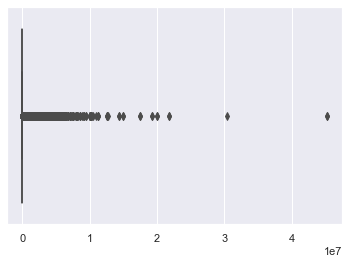

In [496]:
sb.boxplot(df2_win)